# Column Classifier
### Targeting Grid: 5x5
### Ocean Grid 5x5
### No of Ships: 3 ships
### Input : 
1. current targeting_grid - 25 features one for each co-ordinate
2. prev_attack_co_ordinate (eg: A1)
3. prev status (hit,miss,unknown)

### Output:
1. Predict one of the columns [A,B,C,D,E]

### Trained model is saved in a file clf-col-xgboost-{current time}.joblib and used by game.py

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('dataset_X_train.csv', index_col='index')
y_train = pd.read_csv('dataset_y_train.csv', index_col='index')
X_test = pd.read_csv('dataset_X_test.csv', index_col='index')
y_test = pd.read_csv('dataset_y_test.csv', index_col='index')

In [3]:
X_train.info(), y_train.info(), X_test.info(), y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 2 to 23
Data columns (total 38 columns):
cor_0                419 non-null int64
cor_1                419 non-null int64
cor_2                419 non-null int64
cor_3                419 non-null int64
cor_4                419 non-null int64
cor_5                419 non-null int64
cor_6                419 non-null int64
cor_7                419 non-null int64
cor_8                419 non-null int64
cor_9                419 non-null int64
cor_10               419 non-null int64
cor_11               419 non-null int64
cor_12               419 non-null int64
cor_13               419 non-null int64
cor_14               419 non-null int64
cor_15               419 non-null int64
cor_16               419 non-null int64
cor_17               419 non-null int64
cor_18               419 non-null int64
cor_19               419 non-null int64
cor_20               419 non-null int64
cor_21               419 non-null int64
cor_22          

(None, None, None, None)

In [4]:
X_train.head()

,cor_0,cor_1,cor_2,cor_3,cor_4,cor_5,cor_6,cor_7,cor_8,cor_9,...,prev_attack_col_a,prev_attack_col_b,prev_attack_col_c,prev_attack_col_d,prev_attack_col_e,prev_attack_row_1,prev_attack_row_2,prev_attack_row_3,prev_attack_row_4,prev_attack_row_5
index,,,,,,,,,,,,,,,,,,,,,
2,0,-1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6,0,-1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


<BarContainer object of 5 artists>

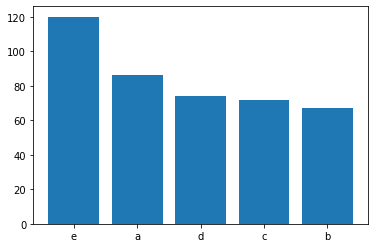

In [5]:
plt.bar(y_train.attack_col.unique(),y_train['attack_col'].value_counts())

<BarContainer object of 5 artists>

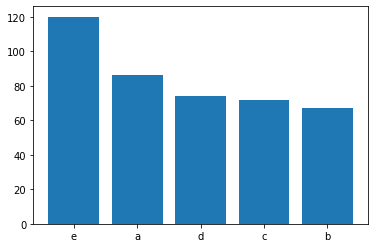

In [6]:
data = pd.concat([X_train, y_train], axis=1)
plt.bar(data['attack_col'].unique(), data['attack_col'].value_counts())

In [7]:
print(data.shape)
max_num = max(data['attack_col'].value_counts())
for label in data['attack_col'].unique():
    label_data = data[data.attack_col == label]
    data = pd.concat([data, label_data.sample(max_num - len(label_data))])
print(data.shape)

(419, 39)
(600, 39)


<BarContainer object of 5 artists>

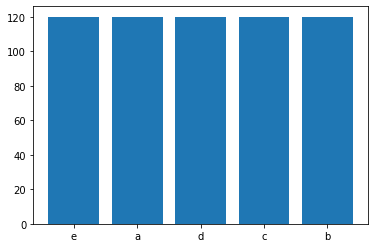

In [8]:
plt.bar(data['attack_col'].unique(), data['attack_col'].value_counts())

In [9]:
# already split from the files so, we dont need to do it here.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((419, 38), (99, 38), (419, 1), (99, 1))

In [24]:
param_dist = {'objective':'multi:softmax', 'num_class':5, 'n_estimators':100, 'max_depth':16}
clf_col = xgb.XGBClassifier(**param_dist)
clf_col.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='merror',  eval_set=[(X_test, y_test)])

[0]	validation_0-merror:0.40404
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.373737
[2]	validation_0-merror:0.353535
[3]	validation_0-merror:0.343434
[4]	validation_0-merror:0.323232
[5]	validation_0-merror:0.333333
[6]	validation_0-merror:0.313131
[7]	validation_0-merror:0.343434
[8]	validation_0-merror:0.313131
[9]	validation_0-merror:0.313131
[10]	validation_0-merror:0.292929
[11]	validation_0-merror:0.282828
[12]	validation_0-merror:0.252525
[13]	validation_0-merror:0.252525
[14]	validation_0-merror:0.252525
[15]	validation_0-merror:0.242424
[16]	validation_0-merror:0.252525
[17]	validation_0-merror:0.242424
[18]	validation_0-merror:0.232323
[19]	validation_0-merror:0.212121
[20]	validation_0-merror:0.20202
[21]	validation_0-merror:0.212121
[22]	validation_0-merror:0.20202
[23]	validation_0-merror:0.20202
[24]	validation_0-merror:0.191919
[25]	validation_0-merror:0.191919
[26]	validation_0-merror:0.181818
[27]	validation_0-merror:0.18

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=16,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [25]:
clf_col.score(X_test, y_test)

0.8282828282828283

In [26]:
clf_col.score(X_train, y_train)

0.9880668257756563

In [27]:
y_pred = clf_col.predict(X_test)
y_pred

array(['c', 'd', 'a', 'd', 'e', 'd', 'c', 'b', 'e', 'e', 'e', 'd', 'e',
       'e', 'd', 'c', 'b', 'a', 'e', 'e', 'b', 'a', 'a', 'c', 'a', 'e',
       'e', 'e', 'a', 'c', 'e', 'e', 'a', 'a', 'a', 'a', 'e', 'd', 'e',
       'c', 'b', 'a', 'a', 'a', 'e', 'd', 'e', 'c', 'd', 'e', 'a', 'd',
       'e', 'd', 'a', 'e', 'e', 'a', 'a', 'b', 'b', 'e', 'd', 'b', 'c',
       'c', 'd', 'c', 'e', 'c', 'e', 'b', 'c', 'd', 'e', 'a', 'e', 'c',
       'e', 'a', 'b', 'e', 'd', 'b', 'a', 'a', 'b', 'c', 'd', 'e', 'd',
       'c', 'c', 'b', 'c', 'b', 'e', 'e', 'e'], dtype=object)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           a       0.76      0.84      0.80        19
           b       0.92      0.86      0.89        14
           c       0.88      0.79      0.83        19
           d       0.88      0.78      0.82        18
           e       0.78      0.86      0.82        29

    accuracy                           0.83        99
   macro avg       0.84      0.83      0.83        99
weighted avg       0.83      0.83      0.83        99



In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0,  0,  3],
       [ 2, 12,  0,  0,  0],
       [ 2,  0, 15,  1,  1],
       [ 0,  0,  1, 14,  3],
       [ 1,  1,  1,  1, 25]])

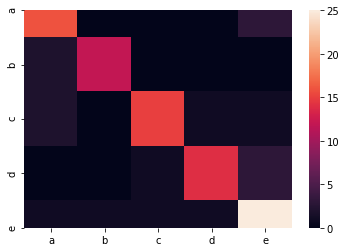

In [30]:
sns.heatmap(cm, xticklabels=clf_col.classes_, yticklabels=clf_col.classes_)

In [31]:
# Save the model
from joblib import dump, load
from datetime import datetime
dump(clf_col, f'clf-col-xgboost-{datetime.now().ctime()}.joblib')


['clf-col-xgboost-Sun Oct 20 23:47:50 2019.joblib']

In [32]:
from sklearn.model_selection import learning_curve
train_size, train_scores, cv_scores = learning_curve(clf_col, X_train, y_train)
train_size.shape, train_scores.shape, cv_scores.shape

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((5,), (5, 3), (5, 3))

In [33]:
train_scores_mean = np.mean(train_scores, axis=1)
cv_scores_mean = np.mean(cv_scores, axis=1)

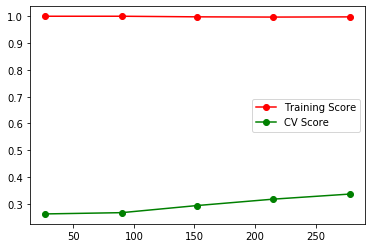

In [34]:
plt.plot(train_size, train_scores_mean, 'o-', color='red', label='Training Score')
plt.plot(train_size, cv_scores_mean, 'o-', color='green', label='CV Score')
plt.legend()
plt.show()